<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用K近邻算法进行分类" data-toc-modified-id="使用K近邻算法进行分类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用K近邻算法进行分类</a></span><ul class="toc-item"><li><span><a href="#模拟数据预测" data-toc-modified-id="模拟数据预测-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>模拟数据预测</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#画出数据" data-toc-modified-id="画出数据-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>画出数据</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="#样本预测" data-toc-modified-id="样本预测-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>样本预测</a></span></li><li><span><a href="#标记最近的点" data-toc-modified-id="标记最近的点-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>标记最近的点</a></span></li></ul></li><li><span><a href="#模拟数据找分界面" data-toc-modified-id="模拟数据找分界面-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>模拟数据找分界面</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="#预测" data-toc-modified-id="预测-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>预测</a></span></li><li><span><a href="#画出拟合线" data-toc-modified-id="画出拟合线-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>画出拟合线</a></span></li></ul></li></ul></li><li><span><a href="#数据案例" data-toc-modified-id="数据案例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据案例</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#加载数据" data-toc-modified-id="加载数据-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>加载数据</a></span></li><li><span><a href="#模型构造" data-toc-modified-id="模型构造-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>模型构造</a></span></li><li><span><a href="#训练模型，计算得分" data-toc-modified-id="训练模型，计算得分-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>训练模型，计算得分</a></span></li><li><span><a href="#交叉验证得分" data-toc-modified-id="交叉验证得分-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>交叉验证得分</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="#特征选择" data-toc-modified-id="特征选择-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>特征选择</a></span></li><li><span><a href="#2个特征下交叉验证得分" data-toc-modified-id="2个特征下交叉验证得分-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>2个特征下交叉验证得分</a></span></li><li><span><a href="#可视化" data-toc-modified-id="可视化-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>可视化</a></span></li><li><span><a href="#交叉验证调超参k" data-toc-modified-id="交叉验证调超参k-2.0.9"><span class="toc-item-num">2.0.9&nbsp;&nbsp;</span>交叉验证调超参k</a></span></li></ul></li></ul></li></ul></div>

# 使用K近邻算法进行分类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 模拟数据预测

### 生成数据

In [2]:
from sklearn.datasets.samples_generator import make_blobs
# 60个训练样本,服从高斯分布,分布在指定中心周围
centers = [[-2,2],[2,2],[0,4]]
X,y = make_blobs(n_samples=60,centers=centers,
                 random_state=0,cluster_std=0.6)
# cluster_std是标准差

### 画出数据

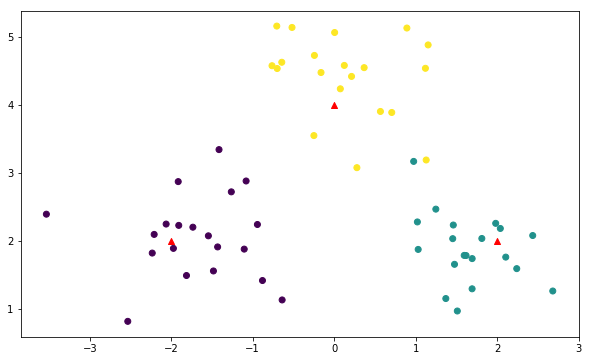

In [3]:
plt.figure(figsize=(10,6))
c=np.array(centers)
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(c[:,0],c[:,1],marker='^',c='r')

### 模型训练

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5).fit(X,y)#n_neighbors 指定k值

### 样本预测

In [5]:
X_sample=[0,2]
X_sample=np.array(X_sample).reshape(1,-1)#变为二维
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

In [6]:
neighbors

array([[16, 20, 48,  6, 23]], dtype=int64)

### 标记最近的点

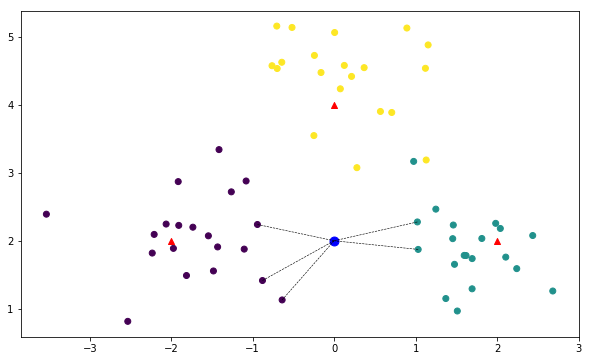

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y)#样本点
plt.scatter(c[:,0],c[:,1],marker='^',c='r')#中心点
plt.scatter(X_sample[0][0],X_sample[0][1],s=80,c='b')#待遇测点
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],"k--",linewidth=0.6)

## 模拟数据找分界面

### 生成数据

In [8]:
n_dots=40
X=5*np.random.rand(n_dots,1)
y=np.cos(X).ravel()#降维
y+=0.2*np.random.rand(n_dots)-0.1#增加噪声

### 模型训练

In [9]:
from sklearn.neighbors import KNeighborsRegressor
clf=KNeighborsRegressor(n_neighbors=5).fit(X,y)

### 预测

In [10]:
T=np.linspace(0,5,500)[:,np.newaxis]#升维
y_pred=clf.predict(T)
clf.score(X,y)#这里的分数就是预测连续变量的指标R2

0.9866398792844846

### 画出拟合线

Text(0.5, 1.0, 'KNeighborsRegressor(k=5)')

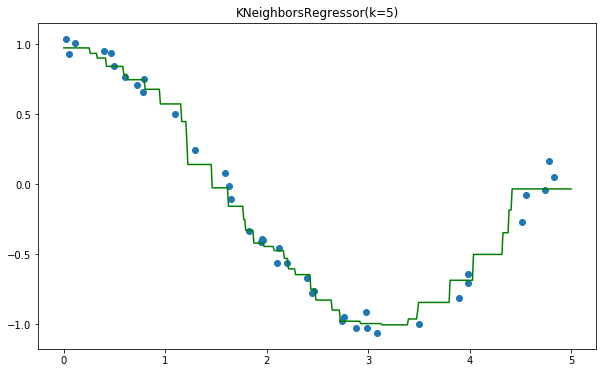

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)#训练样本
plt.plot(T,y_pred,c='g')#预测曲线
plt.axis("tight")# tight表示坐标轴只要能显示出全部数据即可
plt.title('KNeighborsRegressor(k=5)')

# 数据案例

### 加载数据

In [12]:
data=pd.read_csv(r"C:\Users\CDA\python\新建文件夹\KNN\data\diabetes.csv")

In [13]:
print("dataset shape {}".format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


可以看到数据有768个观测(行,样本),8列x,1列y共9列属性(特征,维度):

- Pregnancies:怀孕的次数
- Glucose: 血浆葡萄糖浓度,采用每两小时口服葡萄糖耐量试验得到
- BloodPressure: 舒张压(毫米汞柱)
- SkinThickness: 肱三头肌皮肤褶皱厚度(毫米)
- Insulin: 两个小时血清胰岛素($\mu U$/毫升)
- BMI: 身体质量指数, 体重除以身高的平方
- Diabetes Pedigree Function: 糖尿病血统指数,糖尿病和家族遗传相关
- Age: 年龄
- Outcome: 标记值,0表示没有糖尿病,1表示有糖尿病

In [14]:
X=data.iloc[:,:8]
y=data.iloc[:,8]
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=420)
print('shape of Xtrain {} ;shape of Ytrian {}'.format(Xtrain.shape,Ytrain.shape))

shape of Xtrain (614, 8) ;shape of Ytrian (614,)


### 模型构造

In [15]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=15)))
models.append(('KNN with weights',KNeighborsClassifier(n_neighbors=15,weights='distance')))
models.append(('Radius Neighbors',RadiusNeighborsClassifier(radius=500)))#寻找指定半径内的邻居

### 训练模型，计算得分

In [16]:
results=[]
for name,model in models:
    model.fit(Xtrain,Ytrain)
    results.append((name,model.score(Xtest,Ytest)))
for i in range(3):
    print('name:{},score:{}'.format(results[i][0],results[i][1]))

name:KNN,score:0.7467532467532467
name:KNN with weights,score:0.7467532467532467
name:Radius Neighbors,score:0.6428571428571429


### 交叉验证得分

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,X,y,cv=kfold)
    results.append((name,cv_result))
for i in range(3):
    print('name:{},cross validated score:{}'.format(results[i][0],results[i][1].mean()))

name:KNN,cross validated score:0.7473684210526315
name:KNN with weights,cross validated score:0.7421565276828435
name:Radius Neighbors,cross validated score:0.6497265892002735


### 模型训练

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=15).fit(Xtrain,Ytrain)

train_score=clf.score(Xtrain,Ytrain)
test_score=clf.score(Xtest,Ytest)
print('train_score:{},test_score:{}'.format(train_score,test_score))

train_score:0.7785016286644951,test_score:0.7467532467532467


### 特征选择

选择2个相关性最大的特征

In [19]:
from sklearn.feature_selection import SelectKBest
selector=SelectKBest(k=2)
X_new=selector.fit_transform(X,y)#fit_transform: 应用变换到数组上,返回新数组

### 2个特征下交叉验证得分

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,X_new,y,cv=kfold)
    results.append((name,cv_result))
for i in range(3):
    print('name:{},cross validated score:{}'.format(results[i][0],results[i][1].mean()))

name:KNN,cross validated score:0.738157894736842
name:KNN with weights,cross validated score:0.7382775119617224
name:Radius Neighbors,cross validated score:0.6510252904989747


得分没有提升

### 可视化

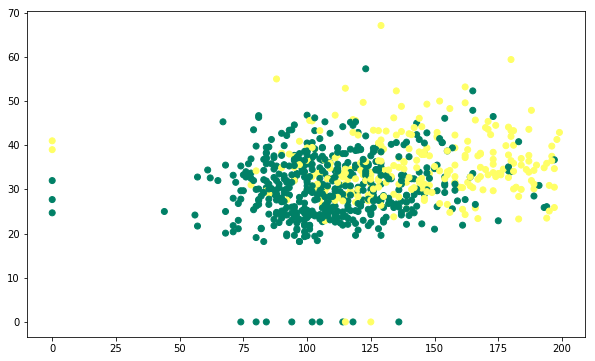

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X_new[:,0],X_new[:,1],c=y,cmap='summer')

### 交叉验证调超参k

In [22]:
neighbors=list(range(1,50))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,Xtrain,Ytrain,cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())

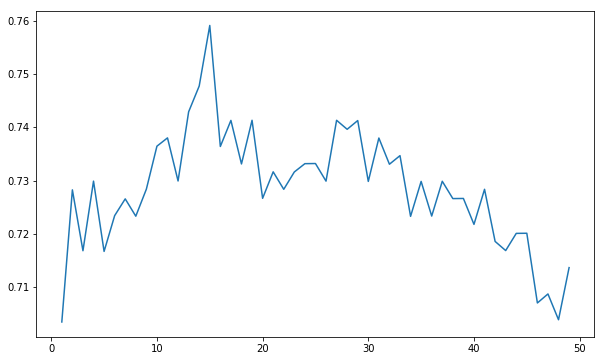

In [23]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,cv_scores)

通过十折交叉验证，本数据k=15已经是最好的预测结果